# Random Over-sampling

Метод полягає у випадковому виборі зразків із меншості (менш представленого класу), доки вони не досягнуть певної пропорції відносно більшості, зазвичай 50:50, або іншими словами, співвідношення 1.

In [2]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   -------------- ------------------------- 92.2/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

In [4]:
ds = pd.read_csv("prepared_dataset.csv")

In [5]:
y_column = ['Status']  # target variable
X_columns = [
    'loan_limit', 'approv_in_adv', 'Credit_Worthiness',
    'business_or_commercial', 'Neg_ammortization', 'interest_only',
    'lump_sum_payment', 'construction_type', 'income',
    'co-applicant_credit_type', 'age', 'submission_of_application',
    'loan_type_type2', 'loan_type_type3', 'occupancy_type_pr',
    'credit_type_EQUI'
]

X = ds[X_columns]
y = ds[y_column]

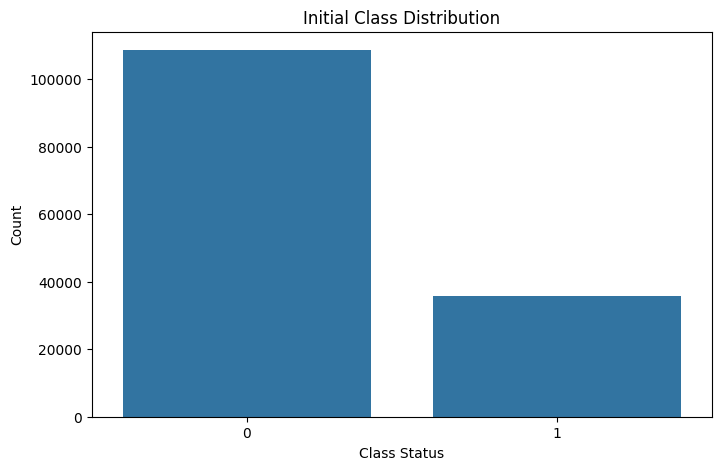

In [6]:
# Plot the initial distribution of classes
plt.figure(figsize=(8, 5))
sns.countplot(x=y['Status'])
plt.title('Initial Class Distribution')
plt.xlabel('Class Status')
plt.ylabel('Count')
plt.show()

In [7]:
# Initialize RandomOverSampler to oversample the minority class
ros = RandomOverSampler(sampling_strategy='auto', random_state=0)

# Perform oversampling
X_res, y_res = ros.fit_resample(X, y)

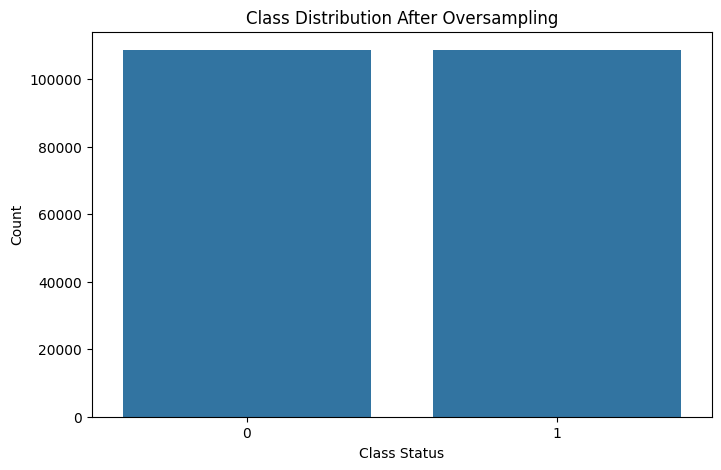

In [8]:
# Plot the distribution of classes after oversampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_res['Status'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class Status')
plt.ylabel('Count')
plt.show()

### Train Gradient Boosting Model after Oversampling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# Train GradientBoostingClassifier with default parameters
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.71      0.91      0.80     21716
           1       0.87      0.63      0.73     21746

    accuracy                           0.77     43462
   macro avg       0.79      0.77      0.76     43462
weighted avg       0.79      0.77      0.76     43462



Використання Random Over-sampling може знижує загальну точність методу градієнтного підвищення, але підвищує F1-оцінку для класу 1.